# Gradient Descent From Scratch

In [3]:
#Choose a cost function of 2 variables : x0, x1
#f(x) = 3*x0**2 + 4*x1**2 - 5*x0 + 7

In [4]:
def funct(x):
    return 3*x[0]**2 + 4*x[1]**2 - 5*x[0] + 7

In [5]:
def slope(x):
    s = [0]*2 #Initialize an array
    s[0] = 6*x[0]-5 # Partial derivative w.r.t x0
    s[1] = 8*x[1] # Partial derivative w.r.t x1
    return s

In [6]:
def gradient_decent(new_weights, prev_weights, learning_rate):
    print(prev_weights)
    print(funct(prev_weights))
    while True:
        prev_weights = new_weights
        w0 = prev_weights[0] - learning_rate*slope(prev_weights)[0]
        w1 = prev_weights[1] - learning_rate*slope(prev_weights)[1]
        new_weights = [w0,w1] #Updating both weights simultaneously
        print(new_weights)
        print(funct(new_weights))
        #Breaking the loop if there is no significant difference in cost
        if (new_weights[0] - prev_weights[0])**2 + (new_weights[1] - prev_weights[1])**2 < pow(10, -6):
            break
        
        

In [7]:
gradient_decent([5,10],[5,10],0.03)

[5, 10]
457
[4.25, 7.6]
270.97749999999996
[3.635, 5.776]
161.91337899999996
[3.1307, 4.38976]
97.83031890039999
[2.717174, 3.3362176]
60.08462513702703
[2.37808268, 2.535525376]
37.790974028107705
[2.1000277976, 1.92699928576]
24.583516253356322
[1.872022794032, 1.4645194571776]
16.732563015773216
[1.68505869110624, 1.113034787454976]
12.048360674226597
[1.5317481267071167, 0.8459064384657817]
9.242247148028154
[1.4060334638998357, 0.6428888932339941]
7.553847501493853
[1.3029474403978654, 0.48859555885783557]
6.533181375871123
[1.2184169011262496, 0.37133262473195505]
5.9130864019803235
[1.1491018589235247, 0.28221279479628586]
5.534372198113799
[1.0922635243172902, 0.21448172404517724]
5.301810837873198
[1.045656089940178, 0.1630061102743347]
5.158193493533129
[1.007437993750946, 0.12388464380849437]
5.068993584890293
[0.9760991548757756, 0.09415232929445572]
5.013271550515018
[0.950401306998136, 0.07155577026378634]
4.978262311072791
[0.9293290717384715, 0.05438238540047762]
4.9561

# Linear Regression from Scratch

In [10]:
#Generate a random regression problem.
from sklearn.datasets import make_regression

In [11]:
X, y = make_regression(n_samples = 200, n_features = 1, n_informative=1, noise=6,bias=30, random_state=200)

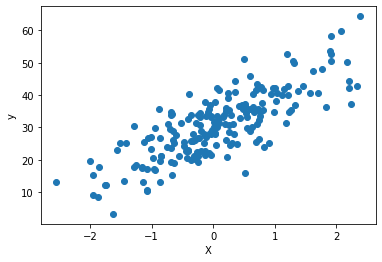

In [12]:
from matplotlib import pyplot as plt
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [13]:
# y = mx + c => y = w1*(input values) + w0
import numpy as np
def linear_model(X,w):
    return(w[1]*np.array(X[:,0]) + w[0])

In [19]:
#Defining Cost function:
def cost(w,X,y):
    return (1/(2*m))*np.sum(np.square(linear_model(X,w) - np.array(y)))

In [16]:
#Gradient Descent
def slope(w,X,y):
    g = [0]*2
    g[0] = (1/m)*np.sum(linear_model(X,w)-np.array(y))
    g[1] = (1/m)*np.sum((linear_model(X,w)-np.array(y))*np.array(X[:,0]))
    return g
m = 200 #No of samples    

In [23]:
def gradient_decent(new_weights, prev_weights, learning_rate):
    print(prev_weights)
    print(cost(prev_weights,X,y))
    j = 0
    while True:
        prev_weights = new_weights
        w0 = prev_weights[0] - learning_rate*slope(prev_weights,X,y)[0]
        w1 = prev_weights[1] - learning_rate*slope(prev_weights,X,y)[1]
        new_weights = [w0,w1] #Updating both weights simultaneously
        print(new_weights)
        print(cost(new_weights,X,y))
        #Breaking the loop if there is no significant difference in cost
        if (new_weights[0] - prev_weights[0])**2 + (new_weights[1] - prev_weights[1])**2 < pow(10, -6):
            return new_weights
        if j>500:
            return new_weights
        j += 1
            

In [22]:
w = [0,-1]
w = gradient_decent(w,w,0.1)
print(w)

[0, -1]
540.5360663843456
[3.0956308633447547, 0.11442770988081663]
437.91139336428444
[5.873446610978822, 1.1023454281382854]
355.5039050187037
[8.366165526017987, 1.9778657783247602]
289.3267499184995
[10.603129563187093, 2.753547324958939]
236.1799750745718
[12.610653489037027, 3.440564026385428]
193.49509649539323
[14.412337853388406, 4.048856351454087]
159.2103901995911
[16.0293495446536, 4.587266032213945]
131.6708284668908
[17.480673291820082, 5.063656213710697]
109.54778810165583
[18.7833371265594, 5.485018573380515]
91.77462156224563
[19.952614505935692, 5.857568814053481]
77.49495508304668
[21.002205515744066, 6.186831784078626]
66.02119816099949
[21.944399323224108, 6.4777173436470505]
56.801246289923824
[22.79021982273288, 6.734587976310905]
49.39175789964725
[23.549556216205993, 6.961319037445921]
43.436706577550574
[24.23128008944935, 7.1613524356181975]
38.6501664442448
[24.843350383306017, 7.337744457271138]
34.802494555336104
[25.39290751357782, 7.493208368754656]
31.7

In [24]:
def graph(formula, xrange):
    x = np.array(xrange)
    y = formula(x)
    plt.plot(x,y)

In [25]:
def line(x):
    return w[0]+w[1]*x

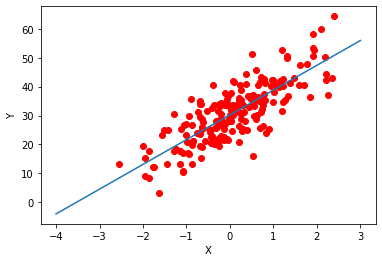

In [27]:
plt.scatter(X,y, c="red")
graph(line,range(-4,4))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()